<a href="https://colab.research.google.com/github/objectis/ai-fraud-detection/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a project for credit card fraud detection using logistic regression model with Scikit-learn.

# Imports

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn

# Reading data

In [0]:
ti=pd.read_csv('sample_data/train_identity.csv',low_memory=False)
tt=pd.read_csv('sample_data/train_transaction.csv',low_memory=False)

#Analysing

In [49]:
ti.shape

(144233, 41)

In [50]:
tt.shape

(590540, 394)

Joining 2 datasets into 1



In [0]:
tf = pd.merge(tt, ti, on = 'TransactionID',how='left')

In [52]:
tf.shape

(590540, 434)

Let's visualise how much data we are missing

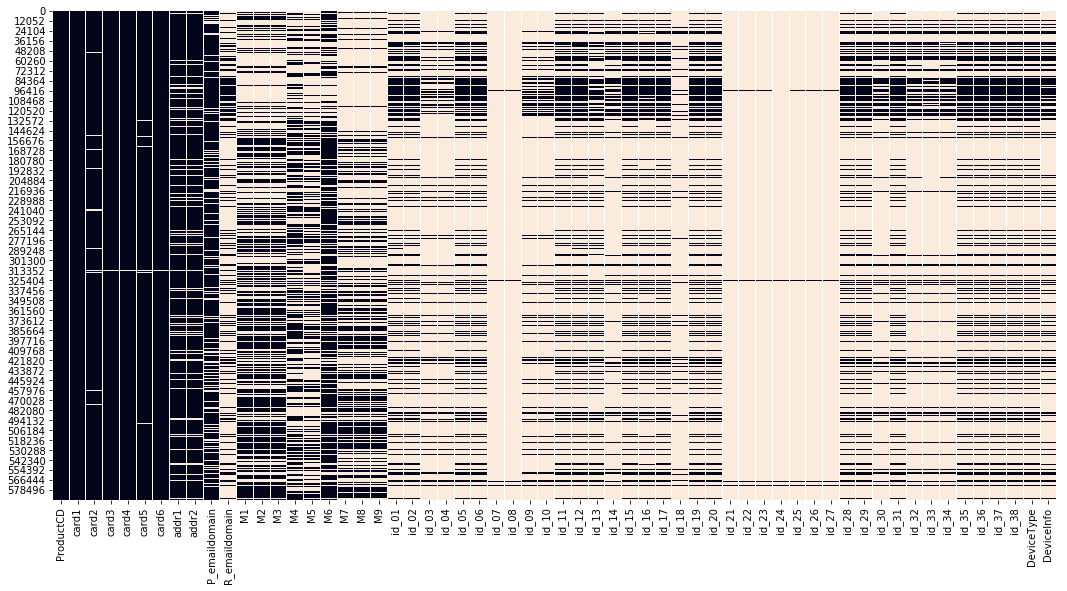

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
tf_cat = tf.filter(regex='id|card|ProductCD|addr|email|M|DeviceType|DeviceInfo')
seaborn.heatmap(tf_cat.isnull(), cbar= False)

How many fraud transactions vs non-fraud

In [57]:
fraud = len(tf[tf['isFraud'] == 1])
nonfraud = len(tf[tf['isFraud'] == 0])
print('Number of fraud transactions: ', fraud)
print('Number of non-fraud transactions: ', nonfraud)
print('Percent of fraud:',fraud*100/nonfraud)


Number of fraud transactions:  20663
Number of non-fraud transactions:  569877
Percent of fraud: 3.625870143908247


#Fintering N/A's

limit of N/A inside a column that we do not tolerate (drop all columns that have more N/As than this percent)

In [0]:
limit = 0.25

In [59]:
def_columns = pd.DataFrame({'na_count':tf.isnull().sum().sort_values(ascending=False)})
def_columns['percent'] = def_columns['na_count']/len(tf)
columnsf = def_columns[def_columns['percent'] < limit].index

tff = tf[tf.columns.intersection(columnsf)]
tff.shape

(590540, 182)

#Categorical values

In [42]:
tff[tff.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6,P_emaildomain
0,W,discover,credit,NaN
1,W,mastercard,credit,gmail.com
2,W,visa,debit,outlook.com
3,W,mastercard,debit,yahoo.com
4,H,mastercard,credit,gmail.com
5,W,visa,debit,gmail.com
6,W,visa,debit,yahoo.com
7,W,visa,debit,mail.com
8,H,visa,debit,anonymous.com
9,W,mastercard,debit,yahoo.com


In [60]:
card4_data = pd.get_dummies(tff['card4'])
card6_data = pd.get_dummies(tff['card6'])

tff = pd.concat([tff,card4_data,card6_data],axis=1)
tff.shape

(590540, 190)